In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from dtreeplt import dtreeplt

data = pd.read_csv("data/customerChurn.csv")

In [2]:
data.head()

,sex,age,Recency,Frequency,Monetary,Churn
0,M,11,4,41,1268981,No
1,M,10,18,15,843996,No
2,F,38,16,41,1755623,No
3,M,13,8,14,862172,No
4,F,20,22,42,748430,No


In [16]:
X = data[['Frequency', 'Recency']]
y = data['Churn']

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

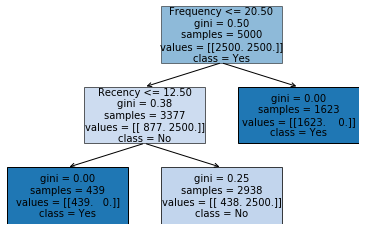

In [10]:
dtree = dtreeplt(
    model=tree,
    feature_names=X.columns,
    target_names=['Yes', 'No']
    )
fig = dtree.view()

/Users/fastbat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Purchase Recency')

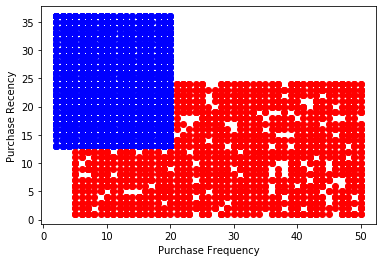

In [19]:
import matplotlib.pyplot as plt

X['predict'] = tree.predict(X)

X_YES = X[X['predict']=='Yes'].copy()
X_NO = X[X['predict']=='No'].copy()
plt.plot(X_YES['Frequency'], X_YES['Recency'], 'bo')
plt.plot(X_NO['Frequency'], X_NO['Recency'], 'ro')
plt.xlabel('Purchase Frequency')
plt.ylabel('Purchase Recency')

### max_depth 제약 해제 

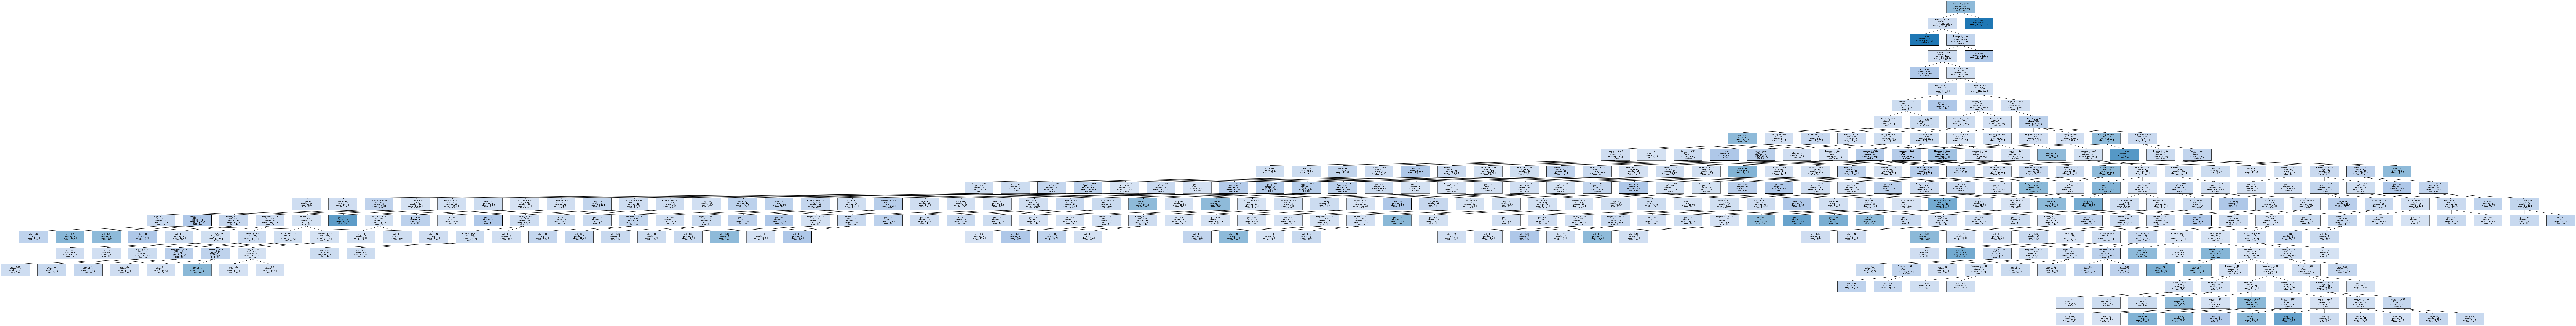

In [21]:
X = X.drop(['predict'], axis=1)

tree = DecisionTreeClassifier()
tree.fit(X, y)

dtree = dtreeplt(
    model=tree,
    feature_names=X.columns,
    target_names=['Yes', 'No']
    )
fig = dtree.view()

Text(0, 0.5, 'Purchase Recency')

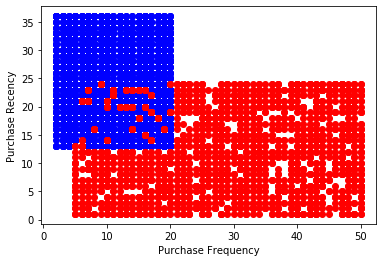

In [23]:
X['predict'] = tree.predict(X)

X_YES = X[X['predict']=='Yes'].copy()
X_NO = X[X['predict']=='No'].copy()
plt.plot(X_YES['Frequency'], X_YES['Recency'], 'bo')
plt.plot(X_NO['Frequency'], X_NO['Recency'], 'ro')
plt.xlabel('Purchase Frequency')
plt.ylabel('Purchase Recency')

### 규제에 따른 성과 측정 

In [34]:
X = data.drop(['sex', 'Churn'], axis=1)
y = data['Churn']

In [38]:
from sklearn.model_selection import cross_val_score

tree4 = DecisionTreeClassifier(max_depth=4)
scores4 = cross_val_score(tree4, X, y, scoring='roc_auc', cv=5)

print("AUC of decision tree with max_depth = 4: {:.3f}".format(scores4.mean()))

AUC of decision tree with max_depth = 4: 0.988


In [37]:
tree = DecisionTreeClassifier()
scores = cross_val_score(tree, X, y, scoring='roc_auc', cv=5)

print("AUC of decision tree : {:.3f}".format(scores.mean()))

AUC of decision tree : 0.954


In [40]:
X = data.drop(['sex', 'Churn'], axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

print("학습 집합 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 집합 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습 집합 정확도: 1.000
테스트 집합 정확도: 0.959


In [41]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
tree.fit(X_train, y_train)

print("학습 집합 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 집합 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습 집합 정확도: 0.976
테스트 집합 정확도: 0.978


## 변수 중요도 측정

In [42]:
print("입력 변수 중요도:\n{}".format(tree.feature_importances_))

입력 변수 중요도:
[0.         0.08872066 0.24642448 0.66485485]


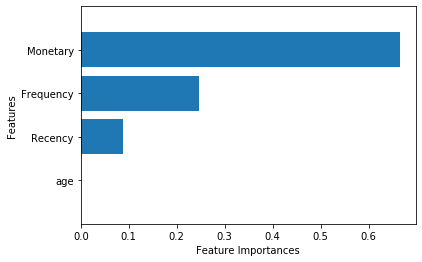

In [43]:
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = model.feature_importances_.shape[0]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

## 회귀 

In [54]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

movie = pd.read_csv('data/MoviePerformance.csv')
movie2 = movie[movie['ScreenFirst'] > 500]

X = movie2[['ScreenFirst', 'BoxOfficeFirst', 'Rating', 'Users']]
y = movie2['BoxOffice']

tree_reg = DecisionTreeRegressor()

scores = cross_val_score(tree_reg, X, y, scoring='neg_mean_absolute_error', cv=5)
scores.mean()

-48367643.19130435

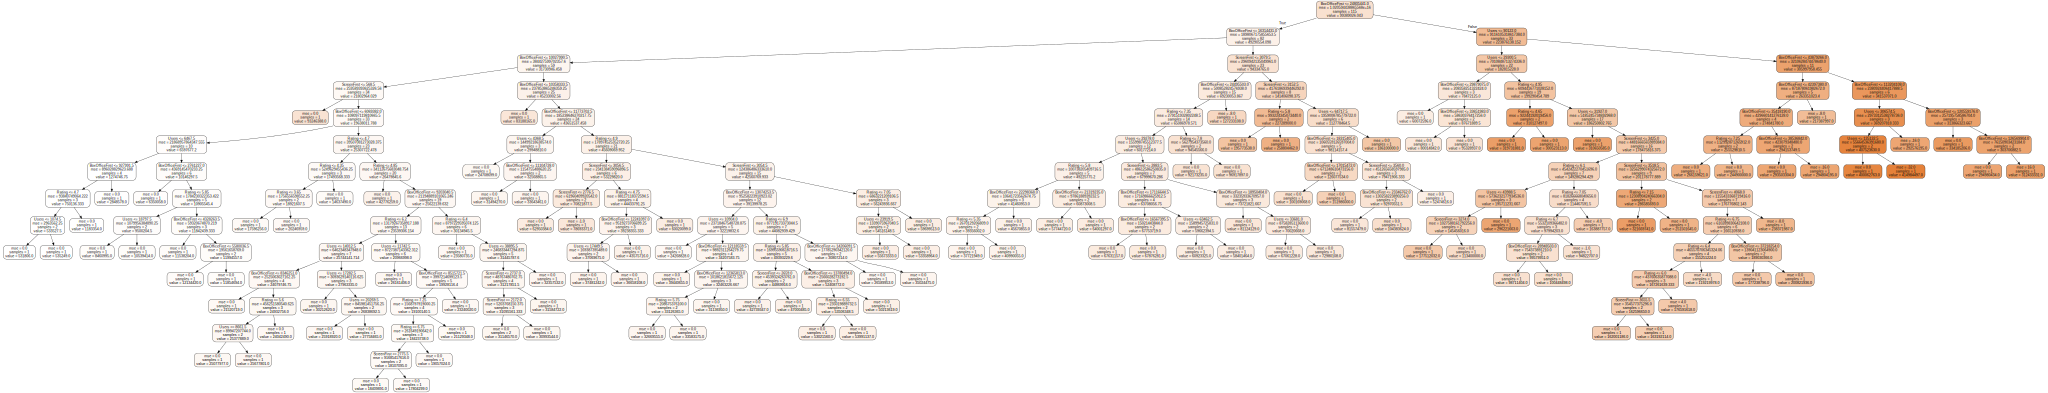

In [64]:
from graphviz import Source
from sklearn.tree import export_graphviz

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)

export_graphviz(
        tree_reg,
        out_file="regression_tree.dot",
        feature_names=X.columns,
        rounded=True,
        filled=True
    )

Source.from_file("regression_tree.dot")

## 범주형 변수 인코딩 

In [56]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from dtreeplt import dtreeplt

data = pd.read_csv("data/customerChurn.csv")

In [57]:
data.head()

,sex,age,Recency,Frequency,Monetary,Churn
0,M,11,4,41,1268981,No
1,M,10,18,15,843996,No
2,F,38,16,41,1755623,No
3,M,13,8,14,862172,No
4,F,20,22,42,748430,No


In [58]:
data['gender'] = data['sex'].replace({'M':0, 'F':1})
data.head()

,sex,age,Recency,Frequency,Monetary,Churn,gender
0,M,11,4,41,1268981,No,0
1,M,10,18,15,843996,No,0
2,F,38,16,41,1755623,No,1
3,M,13,8,14,862172,No,0
4,F,20,22,42,748430,No,1


In [59]:
data['gender2'] = (data['sex'] == 'F').astype(np.int)
data.head()

,sex,age,Recency,Frequency,Monetary,Churn,gender,gender2
0,M,11,4,41,1268981,No,0,0
1,M,10,18,15,843996,No,0,0
2,F,38,16,41,1755623,No,1,1
3,M,13,8,14,862172,No,0,0
4,F,20,22,42,748430,No,1,1


In [60]:
data.describe()

,age,Recency,Frequency,Monetary,gender,gender2
count,5000.00000,5000.00000,5000.000000,5.000000e+03,5000.000000,5000.000000
mean,24.89580,18.52460,19.375200,6.336033e+05,0.304800,0.304800
std,8.93206,9.17053,13.256922,5.620929e+05,0.460369,0.460369
min,10.00000,1.00000,2.000000,1.011800e+04,0.000000,0.000000
25%,17.00000,12.00000,9.000000,2.064685e+05,0.000000,0.000000
50%,25.00000,19.00000,16.000000,4.049140e+05,0.000000,0.000000
75%,33.00000,25.00000,28.000000,1.022440e+06,1.000000,1.000000
max,40.00000,36.00000,50.000000,1.999845e+06,1.000000,1.000000


In [61]:
data['Mcode'] = ['L' if x <= 206468 else 'H' if x > 1022440
	else 'M' for x in data['Monetary']]
data.Mcode.value_counts()

M    2500
H    1250
L    1250
Name: Mcode, dtype: int64

In [62]:
data.head()

,sex,age,Recency,Frequency,Monetary,Churn,gender,gender2,Mcode
0,M,11,4,41,1268981,No,0,0,H
1,M,10,18,15,843996,No,0,0,M
2,F,38,16,41,1755623,No,1,1,H
3,M,13,8,14,862172,No,0,0,M
4,F,20,22,42,748430,No,1,1,M


In [63]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Mcode_ord'] = label_encoder.fit_transform(data['Mcode'])

data.head()

,sex,age,Recency,Frequency,Monetary,Churn,gender,gender2,Mcode,Mcode_ord
0,M,11,4,41,1268981,No,0,0,H,0
1,M,10,18,15,843996,No,0,0,M,2
2,F,38,16,41,1755623,No,1,1,H,0
3,M,13,8,14,862172,No,0,0,M,2
4,F,20,22,42,748430,No,1,1,M,2


In [64]:
data.tail()

,sex,age,Recency,Frequency,Monetary,Churn,gender,gender2,Mcode,Mcode_ord
4995,M,29,32,13,369598,Yes,0,0,M,2
4996,M,27,27,7,484117,Yes,0,0,M,2
4997,M,29,23,18,63783,Yes,0,0,L,1
4998,M,30,28,2,285674,Yes,0,0,M,2
4999,M,32,18,6,175385,Yes,0,0,L,1


In [65]:
ord = {'H':2,'M':1,'L':0}

data['Mcode_ord_2'] = data.Mcode.map(ord)

data.head()

,sex,age,Recency,Frequency,Monetary,Churn,gender,gender2,Mcode,Mcode_ord,Mcode_ord_2
0,M,11,4,41,1268981,No,0,0,H,0,2
1,M,10,18,15,843996,No,0,0,M,2,1
2,F,38,16,41,1755623,No,1,1,H,0,2
3,M,13,8,14,862172,No,0,0,M,2,1
4,F,20,22,42,748430,No,1,1,M,2,1


In [66]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data['Mcode_ord_3'] = ordinal_encoder.fit_transform(data.Mcode.values.reshape(-1,1))
data.head()

,sex,age,Recency,Frequency,Monetary,Churn,gender,gender2,Mcode,Mcode_ord,Mcode_ord_2,Mcode_ord_3
0,M,11,4,41,1268981,No,0,0,H,0,2,0.0
1,M,10,18,15,843996,No,0,0,M,2,1,2.0
2,F,38,16,41,1755623,No,1,1,H,0,2,0.0
3,M,13,8,14,862172,No,0,0,M,2,1,2.0
4,F,20,22,42,748430,No,1,1,M,2,1,2.0


In [67]:
X = data.drop(['Churn'], axis=1)
y = data['Churn']
X_ohe = pd.get_dummies(X)
X_ohe.head()

,age,Recency,Frequency,Monetary,gender,gender2,Mcode_ord,Mcode_ord_2,Mcode_ord_3,sex_F,sex_M,Mcode_H,Mcode_L,Mcode_M
0,11,4,41,1268981,0,0,0,2,0.0,0,1,1,0,0
1,10,18,15,843996,0,0,2,1,2.0,0,1,0,0,1
2,38,16,41,1755623,1,1,0,2,0.0,1,0,1,0,0
3,13,8,14,862172,0,0,2,1,2.0,0,1,0,0,1
4,20,22,42,748430,1,1,2,1,2.0,1,0,0,0,1


In [68]:
X = data.drop(['Churn'], axis=1)
y = data['Churn']
X_ohe = pd.get_dummies(X,drop_first=True)
X_ohe.head()

,age,Recency,Frequency,Monetary,gender,gender2,Mcode_ord,Mcode_ord_2,Mcode_ord_3,sex_M,Mcode_L,Mcode_M
0,11,4,41,1268981,0,0,0,2,0.0,1,0,0
1,10,18,15,843996,0,0,2,1,2.0,1,0,1
2,38,16,41,1755623,1,1,0,2,0.0,0,0,0
3,13,8,14,862172,0,0,2,1,2.0,1,0,1
4,20,22,42,748430,1,1,2,1,2.0,0,0,1


In [69]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
ohe = ohc.fit_transform(data.Mcode.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(ohe, columns = ["Mcode_" + str(ohc.categories_[0][i])
                                       for i in range(len(ohc.categories_[0]))])
data = pd.concat([data, dfOneHot], axis=1)
data.head()

,sex,age,Recency,Frequency,Monetary,Churn,gender,gender2,Mcode,Mcode_ord,Mcode_ord_2,Mcode_ord_3,Mcode_H,Mcode_L,Mcode_M
0,M,11,4,41,1268981,No,0,0,H,0,2,0.0,1.0,0.0,0.0
1,M,10,18,15,843996,No,0,0,M,2,1,2.0,0.0,0.0,1.0
2,F,38,16,41,1755623,No,1,1,H,0,2,0.0,1.0,0.0,0.0
3,M,13,8,14,862172,No,0,0,M,2,1,2.0,0.0,0.0,1.0
4,F,20,22,42,748430,No,1,1,M,2,1,2.0,0.0,0.0,1.0


In [70]:
X = data.drop(['sex','Churn','gender2','Monetary','Mcode','Mcode_ord','Mcode_ord_2','Mcode_ord_3'], axis=1)
y = data['Churn']

In [72]:
X.head()

,age,Recency,Frequency,gender,Mcode_H,Mcode_L,Mcode_M
0,11,4,41,0,1.0,0.0,0.0
1,10,18,15,0,0.0,0.0,1.0
2,38,16,41,1,1.0,0.0,0.0
3,13,8,14,0,0.0,0.0,1.0
4,20,22,42,1,0.0,0.0,1.0


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.2)

tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

print("학습 집합 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 집합 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습 집합 정확도: 1.000
테스트 집합 정확도: 0.944


In [77]:
def plot_feature_importances(model):
    n_features = model.feature_importances_.shape[0]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

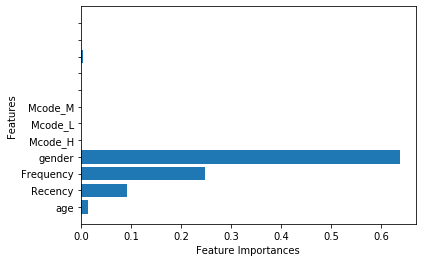

In [78]:
import matplotlib.pyplot as plt

plot_feature_importances(tree)

## 연습문제 

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [81]:
churn = pd.read_csv('data/Churn_Modelling.csv')

churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


RowNumber : Row Numbers from 1 to 10000

CustomerId : Unique Ids for bank customer identification

Surname: Customer's last name

CreditScore : Credit score of the customer

Geography : The country from which the customer belongs

Gender : Male or Female

Age : Age of the customer

Tenure : Number of years for which the customer has been with the bank

Balance : Bank balance of the customer

NumOfProducts : Number of bank products the customer is utilising

HasCrCard : Binary Flag for whether the customer holds a credit card with the bank or not

IsActiveMember : Binary Flag for whether the customer is an active member with the bank or not

EstimatedSalary : Estimated salary of the customer in Dollars

Exited : Binary flag 1 if the customer closed account with bank and 0 if the customer is retained 

### Exited가 종속변수이며 수치형 변수와 범주형 변수가 있음

In [82]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [83]:
churn.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [84]:
churn.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [88]:
X = churn.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = churn['Exited']

In [89]:
X_ohe = pd.get_dummies(X)
X_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.2)

tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

print("학습 집합 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 집합 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습 집합 정확도: 1.000
테스트 집합 정확도: 0.782


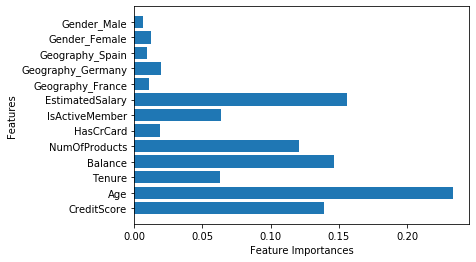

In [91]:
def plot_feature_importances(model):
    n_features = model.feature_importances_.shape[0]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_ohe.columns)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

### 불순도 계산 방안의 차이

In [92]:
tree_cv = DecisionTreeClassifier(criterion='entropy')

scores = cross_val_score(tree_cv, X_ohe, y, scoring='roc_auc', cv=5)
scores.mean()

0.6924788077776974

In [93]:
tree_cv = DecisionTreeClassifier(criterion='gini')

scores = cross_val_score(tree_cv, X_ohe, y, scoring='roc_auc', cv=5)
scores.mean()

0.6896616881054273

### 규제

In [99]:
score_list = []
I = range(2,11)

for i in I:
    tree_cv = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    scores = cross_val_score(tree_cv, X_ohe, y, scoring='roc_auc', cv=5)
    score_list.append(scores.mean())
    print("AUC score with max_depth {}: {:.3f}".format(i,scores.mean()))

AUC score with max_depth 2: 0.744
AUC score with max_depth 3: 0.795
AUC score with max_depth 4: 0.816
AUC score with max_depth 5: 0.836
AUC score with max_depth 6: 0.839
AUC score with max_depth 7: 0.837
AUC score with max_depth 8: 0.830
AUC score with max_depth 9: 0.811
AUC score with max_depth 10: 0.788


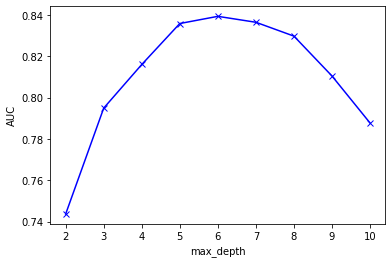

In [100]:
plt.plot(I, score_list, 'bx-')
plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.show()

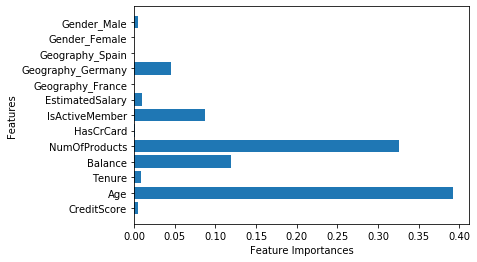

In [101]:
tree_6 = DecisionTreeClassifier(criterion='entropy', max_depth=6)
tree_6.fit(X_train, y_train)

plot_feature_importances(tree_6)